# A common interface for handling gridded data

We've already seen that astropy has a Table class that provides a uniform way of reading, manipulating, and writing table data. Similarly, the [astropy.nddata](http://docs.astropy.org/en/stable/nddata/index.html) sub-package provides an [NDData](http://docs.astropy.org/en/stable/api/astropy.nddata.NDData.html#astropy.nddata.NDData) class that provide a common interface to datasets that consist of an n-dimensional array optionally with WCS information. In addition, this sub-package provides a set of utilities that can operate on NDData objects as well as Numpy arrays.



<section class="objectives panel panel-warning">
<div class="panel-heading">
<h2><span class="fa fa-certificate"></span> Objectives</h2>
</div>


<div class="panel-body">

<ul>
<li>Create an NDData object</li>
<li>Create/read in a CCDData object</li>
<li>Extract cutouts from image data with WCS information</li>
<li>Resize n-dimensional data</li>
</ul>

</div>

</section>


## Documentation

This notebook only shows a subset of the functionality in astropy.nddata. For more information about the features presented below as well as other available features, you can read the
[astropy.nddata documentation](https://docs.astropy.org/en/stable/nddata/).

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rc('image', origin='lower')
plt.rc('figure', figsize=(10, 6))

## Creating an NDData object

The main class in the [astropy.nddata](http://docs.astropy.org/en/stable/nddata/index.html) sub-package is [NDData](http://docs.astropy.org/en/stable/api/astropy.nddata.NDData.html#astropy.nddata.NDData):

In [3]:
from astropy.nddata import NDData

The simplest way to initialize NDData is with a data array:

In [4]:
import numpy as np
data = np.random.random((16,16,16))
ndd1 = NDData(data)

In [5]:
ndd1

NDData([[[0.55336703, 0.20063346, 0.42268549, ..., 0.11612243,
          0.17178894, 0.89541128],
         [0.92246889, 0.42441659, 0.58239118, ..., 0.53035981,
          0.73069053, 0.94592684],
         [0.64538757, 0.7455126 , 0.73466556, ..., 0.81295644,
          0.18230529, 0.9335859 ],
         ...,
         [0.11664676, 0.28283365, 0.79975851, ..., 0.57718071,
          0.9285818 , 0.87149592],
         [0.4622807 , 0.06377893, 0.45013733, ..., 0.12824185,
          0.60736103, 0.59317219],
         [0.89091707, 0.42298437, 0.56311123, ..., 0.55123264,
          0.8080751 , 0.05261045]],

        [[0.76358523, 0.8268039 , 0.58859266, ..., 0.25948952,
          0.65210765, 0.12040009],
         [0.66066626, 0.5391888 , 0.86834228, ..., 0.28665756,
          0.82734664, 0.48503267],
         [0.88002889, 0.17658989, 0.85140788, ..., 0.65708342,
          0.94617236, 0.41202678],
         ...,
         [0.80289061, 0.97950583, 0.47632296, ..., 0.53124627,
          0.38707247, 0.0

The real value from NDData comes from the ability to add other meta-data, such as the unit, a mask, or WCS information:

In [6]:
from astropy import units as u
from astropy.wcs import WCS
wcs = WCS(naxis=3)
mask = data > 0.5

In [13]:
ndd2 = NDData(data, mask=mask, unit=u.Jy, wcs=wcs)

In [14]:
ndd2.wcs

WCS Keywords

Number of WCS axes: 3
CTYPE : ''  ''  ''  
CRVAL : 0.0  0.0  0.0  
CRPIX : 0.0  0.0  0.0  
PC1_1 PC1_2 PC1_3  : 1.0  0.0  0.0  
PC2_1 PC2_2 PC2_3  : 0.0  1.0  0.0  
PC3_1 PC3_2 PC3_3  : 0.0  0.0  1.0  
CDELT : 1.0  1.0  1.0  
NAXIS : 0  0

It is also possible to attach uncertainties:

In [17]:
from astropy.nddata import StdDevUncertainty
uncertainty = StdDevUncertainty(data / 10)
ndd3 = NDData(data, uncertainty=uncertainty)

In [21]:
ndd3.uncertainty

StdDevUncertainty([[[0.0553367 , 0.02006335, 0.04226855, ..., 0.01161224,
                     0.01717889, 0.08954113],
                    [0.09224689, 0.04244166, 0.05823912, ..., 0.05303598,
                     0.07306905, 0.09459268],
                    [0.06453876, 0.07455126, 0.07346656, ..., 0.08129564,
                     0.01823053, 0.09335859],
                    ...,
                    [0.01166468, 0.02828336, 0.07997585, ..., 0.05771807,
                     0.09285818, 0.08714959],
                    [0.04622807, 0.00637789, 0.04501373, ..., 0.01282418,
                     0.0607361 , 0.05931722],
                    [0.08909171, 0.04229844, 0.05631112, ..., 0.05512326,
                     0.08080751, 0.00526105]],

                   [[0.07635852, 0.08268039, 0.05885927, ..., 0.02594895,
                     0.06521077, 0.01204001],
                    [0.06606663, 0.05391888, 0.08683423, ..., 0.02866576,
                     0.08273466, 0.04850327],
             

## Using the CCDData class

For now, NDData is just a data container, so it does not have useful methods on it. A more useful class is [CCDData](http://docs.astropy.org/en/stable/api/astropy.nddata.CCDData.html#astropy.nddata.CCDData) which is a sub-class of NDData and is a good example to demonstrate NDData functionality:

In [22]:
from astropy.nddata import CCDData

The CCDData class recognizes FITS files:

In [23]:
ccd = CCDData.read('data/gc_2mass_k.fits', unit='count')
ccd

CCDData([[563.1581 , 540.4065 , 524.3385 , ..., 498.93182, 501.9532 ,
          640.75134],
         [514.72516, 586.9167 , 514.5878 , ..., 505.34076, 504.9287 ,
          506.39362],
         [510.01007, 510.19318, 521.3172 , ..., 532.62427, 515.7323 ,
          526.5816 ],
         ...,
         [530.24384, 532.5785 , 536.1492 , ..., 557.43585, 510.60516,
          517.9296 ],
         [521.363  , 524.3385 , 518.0212 , ..., 540.0403 , 546.3118 ,
          544.25183],
         [519.6692 , 525.71185, 522.8278 , ..., 544.7096 , 522.2785 ,
          543.06165]])

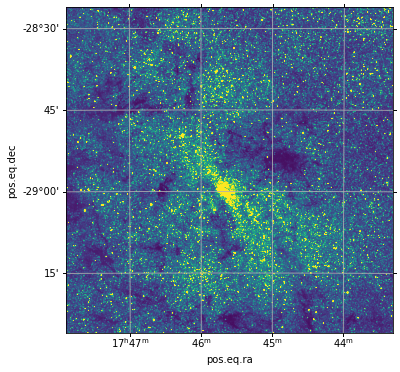

In [24]:
plt.subplot(projection=ccd.wcs)
plt.imshow(ccd.data, vmax=800)
plt.grid()

A useful aspect of NDData classes like CCDData is that they can be sliced like Numpy arrays and this automatically slices the mask, uncertainty, and WCS (if present):

In [25]:
subccd = ccd[100:300, 200:400]

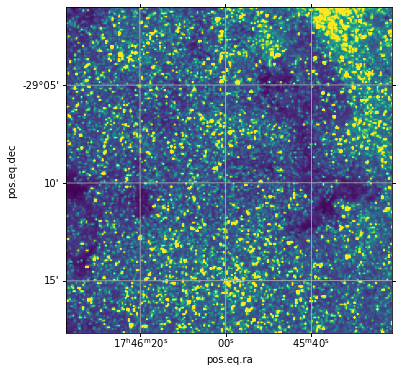

In [27]:
plt.subplot(projection=subccd.wcs)
plt.imshow(subccd.data, vmax=800)
plt.grid()

Another useful feature is the ability to do arithmetic between CCDData objects and have uncertainties propagate automatically:

In [28]:
ccd1 = CCDData([1, 2, 3], unit='count',
               uncertainty=StdDevUncertainty([1, 1.2, 1.5]))
ccd2 = CCDData([0.5, 0.5, 0.5], unit='count',
               uncertainty=StdDevUncertainty([0.2, 0.1, 0.3]))

In [29]:
ccd_sub = ccd1.subtract(ccd2)

In [31]:
ccd_sub.data

array([0.5, 1.5, 2.5])

In [32]:
ccd_sub.uncertainty

StdDevUncertainty([1.0198039 , 1.20415946, 1.52970585])

Note however that at the moment this framework does not understand correlated errors!

In [33]:
ccd1.divide(ccd1).uncertainty

StdDevUncertainty([1.41421356, 0.84852814, 0.70710678])

## Extracting cutouts from images

As seen above, we can easily extract cutouts of NDData objects by using slicing - however, the astropy.nddata sub-package also provides a [Cutout2D](http://docs.astropy.org/en/stable/api/astropy.nddata.Cutout2D.html#astropy.nddata.Cutout2D) class that can be used to generate cutouts from data, either as NDData objects or as plain arrays and WCS objects:

In [34]:
from astropy.nddata import Cutout2D

One of the main benefits of this class is that allows cutouts to be extracted by specifying celestial coordinates rather than just pixel coordinates:

In [35]:
from astropy.coordinates import SkyCoord
galcen = SkyCoord(0 * u.deg, 0* u.deg, frame = 'galactic')

In [36]:
cutout = Cutout2D(ccd.data, galcen, 20*u.arcmin, wcs=ccd.wcs)

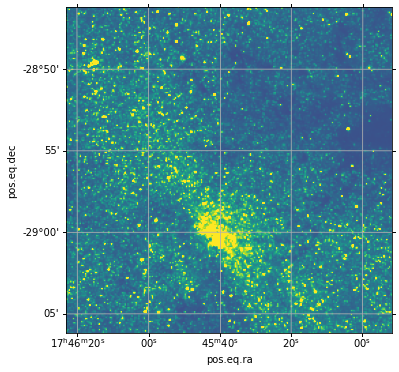

In [39]:
plt.subplot(projection=cutout.wcs)
plt.imshow(cutout.data, vmin=300, vmax=1000)
plt.grid()

The Cutout2D object also retains information about where it was extracted from in the image:

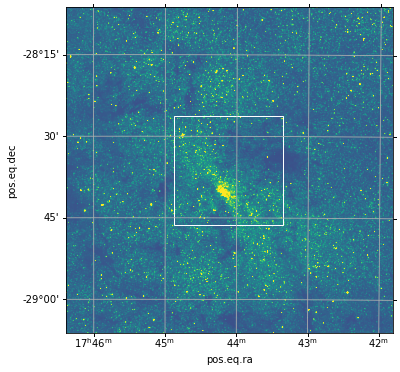

In [42]:
plt.subplot(projection=cutout.wcs)
plt.imshow(ccd.data, vmin=300, vmax=1000)
plt.grid()
cutout.plot_on_original(color='white');

and we can therefore also convert positions in the cutout back to positions in the original image:

In [43]:
cutout.to_original_position((20, 30))

(257, 268)

## Resizing images

Another set of useful functions in astropy.nddata are [block_reduce](http://docs.astropy.org/en/stable/api/astropy.nddata.block_reduce.html#astropy.nddata.block_reduce) and [block_replicate](http://docs.astropy.org/en/stable/api/astropy.nddata.block_replicate.html#astropy.nddata.block_replicate) which can be used to downsample and upsample data by integer factors:

In [44]:
from astropy.nddata import block_reduce, block_replicate

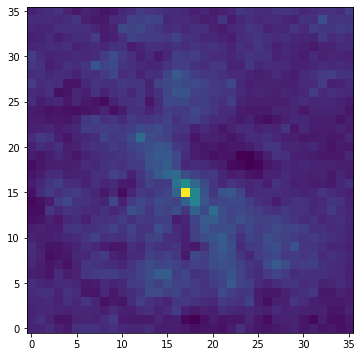

In [47]:
plt.imshow(block_reduce(ccd.data, 20));

In [ ]:
plt.imshow(block_replicate(ccd.data, ))

For now, this does not properly support NDData objects or scaling the WCS information (see [astropy/astropy#4796](https://github.com/astropy/astropy/issues/4796) for an example of as astropy feature request!).

<center><i>This notebook was originally written by <a href="https://aperiosoftware.com/">Aperio Software Ltd</a> and modified by Brigitta Sipőcz. &copy; 2019-2021 and is licensed under a <a href="https://creativecommons.org/licenses/by/4.0/">Creative Commons Attribution 4.0 International License (CC BY 4.0)</a></i></center>

![cc](https://mirrors.creativecommons.org/presskit/buttons/88x31/svg/by.svg)